In [4]:
import pandas as pd
import numpy as np
auctions_dtypes = {'auction_type_id': np.float16, 'country': 'category', 'platform': 'category',
                   'ref_type_id': 'category', 'source_id': 'category', 'device_id': 'category'}
auctions = pd.read_csv('auctions.csv.gzip', compression = 'gzip', dtype = auctions_dtypes)

In [5]:
auctions.drop('auction_type_id', axis = 1, inplace = True)

In [6]:
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")

In [7]:
auctions.head()

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [8]:
auctions.dtypes

country              category
date           datetime64[ns]
device_id            category
platform             category
ref_type_id          category
source_id            category
dtype: object

In [10]:
clicks_dtypes = {'advertiser': np.int8, 'action_id': np.float16, 'source_id': np.int8, 'country_code': 'category',
                 'latitude': np.float16, 'longitude': np.float16, 'carrier_id': np.float16, 'brand': np.float16,
                 'touchX': np.float16, 'touchY': np.float16}
clicks = pd.read_csv('clicks.csv.gzip', compression = 'gzip', dtype = clicks_dtypes)

In [12]:
clicks["created"] =  pd.to_datetime(clicks["created"])

In [13]:
clicks["hora"] = clicks["created"].dt.hour
clicks["click_count"] = 1

In [14]:
clicks.groupby(by="hora").agg({"click_count":"count"})

,click_count
hora,
0,440
1,4209
2,2327
3,754
4,1079
5,945
6,678
7,518
8,537


In [19]:
auctions["hora"] = auctions["date"].dt.hour
auctions["auction_count"] = 1

In [20]:
auc_x_hora = auctions.groupby(by="hora").agg({"auction_count":"count"})
clicks_x_hora = clicks.groupby(by="hora").agg({"click_count":"count"})

In [21]:
join_por_hora = auc_x_hora.join(clicks_x_hora)

In [24]:
join_por_hora["porcentaje"] =  join_por_hora["click_count"] * 100 / join_por_hora["auction_count"]

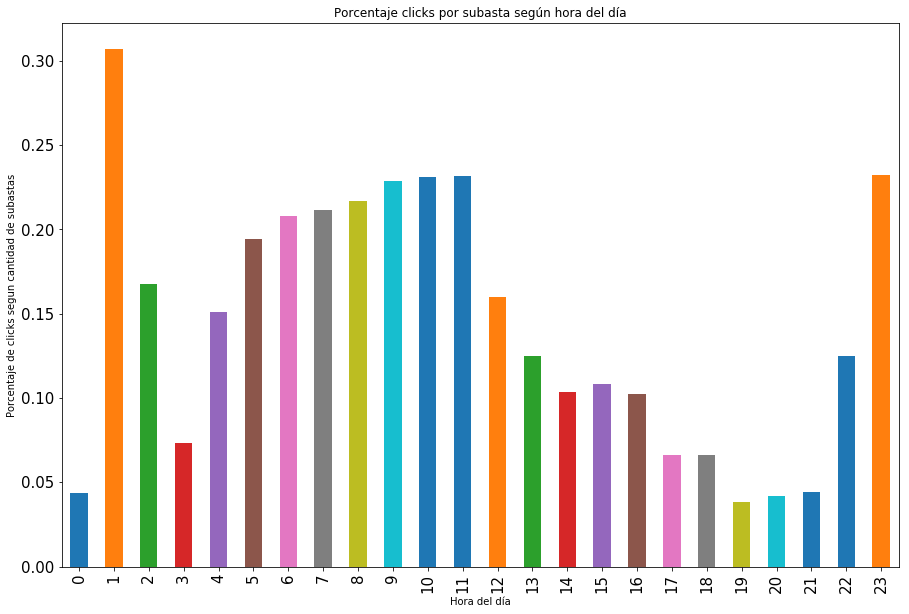

In [29]:
ax = join_por_hora["porcentaje"].plot(kind="bar",figsize=(15,10),fontsize=15 , title="Porcentaje clicks por subasta según hora del día")
ax.set_xlabel("Hora del día")
ax.set_ylabel("Porcentaje de clicks segun cantidad de subastas")
ax

In [31]:
auctions.head(1)

,country,date,device_id,platform,ref_type_id,source_id,hora,auction_count
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,14,1


In [33]:
clicks.advertiser_id.value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

In [39]:
auctions['device_id'].value_counts()

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
8963711959081981780    14362
795159065504552200     12275
6841615430383729819    12077
5384039226444052914    11632
3198179064438296471    11565
519658456951133298     10541
2435544514359302887    10274
8751190726444323885    10256
1835469468095030098    10121
1800317677967270083    10036
9027154272484048876     9958
7574657722181550308     9767
5051610571898428259     9642
320899491737875154      9388
8292793494956750501     9315
201759600719985554      9158
8021195662481548645     9128
7650408579713341483     9020
6392567838173461255     8994
1478017482044456084     8839
6203407103275384250     8823
68016455690089173       8809
8496718680483076445     8682
8491787427844905567     8513
4834359787191717922     8495
                       ...  
5965915879234710356        1
5962371857976871552        1
8775830221902480502        1
64006732464093

In [48]:
clicks['trans_id'].value_counts()

KdBnICuNg6KSSooMPF6esC9etYfFfVg    1
3AgOlw7z-Za2j6MYclzx6dpk6AYB95s    1
tN_3SRf49hg8oYfZiCvidgUseUQ_iEI    1
S2CPC7rgiM6sVT5igiooVR-x5Rg0g4o    1
1l93qjMA5p13HbhnXCwJzUA6LEdIF4s    1
qd3FEH_z1Dq_jKnHTmUXZIZxsnwzzsA    1
an7PTGuvvH96RptBzwcWpXJ925JK4gI    1
4cD_VGQgwW2hdg-B8zJpkfIaRb0flmg    1
TAeXObB9PJBuU3vSr5fvxo70JwiKe4c    1
fSSsRSBC6i_MfrachRM8xKACs6hilW0    1
cFHu-FxBZXnSlvaTb7AizXIAVzlJ8IY    1
tJKV0r4k3IAqGTYOZbedWhvA_N81ITY    1
2KGRowz2gYhHxQ2VeWasrNhvhFWxXcg    1
Brim4pMpBZQHs9hn3QmGUyfgoHlh9rk    1
aljaHutN9crWOLXWNgmi3BGwxQ8fiKs    1
Ztvo_ceafAPoUv2nKN4lllukpbQbWUE    1
084MHRqbJV7qXzD04K3X_25u-xmx4ag    1
7Z-dZyzMI3Eu9triAx9BOzA_2CMZU3Q    1
1S0DdHdNjRNKNnBLDKvVAtth44tbNRQ    1
e_J-BHUX3bC3MK7CAB_i4MyqHkOGu4E    1
KHxjauRVKfepC2g5_NR4PDPlcjBCISY    1
S2daBMYS4i3QCxBLVj2LJQvWpSuV19s    1
ZpfsJ7YVGoA6c2zud2_s-5f28YRjHIM    1
SWH26dGJAR-kEJLg0ish6bNREVSJh8k    1
rOrkWN6KulADAwjUo1VP7EnGfko5o8I    1
IibMvxjf35oH7-3nxhVnmSnG6rigtY8    1
9lxoWmKj-6hCvTsJC31wdXbzxBQz24c    1
y

In [44]:
auctions.source_id.value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64